In [1]:
from textblob import TextBlob
import pandas as pd
import re
import nltk
import string
import tweepy
import numpy as np

In [2]:
dataset = pd.read_csv('final.csv' , encoding='mac_roman', engine='python')

In [3]:
dataset.head()

tweet_processed
0  completely healthy  year old develops life thr...
1  i see faucidogtorturer trending beagles are ro...
2   million doses of covidvaccine ready to go for...
3  the world isn't just battling the coronavirus ...
4  not good news for ppl on anti-cd meds rituxima...

In [4]:
df=dataset

In [5]:
import re

In [6]:
df['tweet_processed'] = df['tweet_processed'].map(lambda x: re.sub('[,\\.!?]', '', x)) #remove special characters 

In [7]:
df['tweet_processed'] = df['tweet_processed'].map(lambda x: x.lower()) #change to lowercase

In [8]:
df.tweet_processed = df['tweet_processed'].map(lambda x: re.sub(r'#' , '', x)) #remove hashtags 

In [9]:
df.tweet_processed = df['tweet_processed'].map(lambda x: re.sub(r'@[^\s]*', "" , x)) #remove mentions 

In [10]:
df.tweet_processed = df['tweet_processed'].map(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '', x)) #remove links 

In [11]:
df.tweet_processed = df['tweet_processed'].map(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
df

tweet_processed
0     completely healthy  year old develops life thr...
1     i see faucidogtorturer trending beagles are ro...
2      million doses of covidvaccine ready to go for...
3     the world isn't just battling the coronavirus ...
4     not good news for ppl on anti-cd meds rituxima...
...                                                 ...
1906  if they put vaccine in liquor half the populat...
1907  south africa wants to return india's vaccines ...
1908  india sends free covaxin covishield vaccines t...
1909  india is yet to endorse sputnikv as usual euro...
1910  covid southafrican variant detected in india h...

[1911 rows x 1 columns]

In [12]:
df.tweet_processed = df['tweet_processed'].map(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '', x)) #remove links

### Removing unwanted tweets - Remove tweets with less than 5 words

In [13]:
import nltk

from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
df_clean = df 
df_clean['token'] = df_clean['tweet_processed']
df_clean

tweet_processed  \
0     completely healthy  year old develops life thr...   
1     i see faucidogtorturer trending beagles are ro...   
2      million doses of covidvaccine ready to go for...   
3     the world isn't just battling the coronavirus ...   
4     not good news for ppl on anti-cd meds rituxima...   
...                                                 ...   
1906  if they put vaccine in liquor half the populat...   
1907  south africa wants to return india's vaccines ...   
1908  india sends free covaxin covishield vaccines t...   
1909  india is yet to endorse sputnikv as usual euro...   
1910  covid southafrican variant detected in india h...   

                                                  token  
0     completely healthy  year old develops life thr...  
1     i see faucidogtorturer trending beagles are ro...  
2      million doses of covidvaccine ready to go for...  
3     the world isn't just battling the coronavirus ...  
4     not good news for ppl on anti-cd meds rituxima...  
...                                                 ...  
1906  if they put vaccine in liquor half the populat...  
1907  south africa wants to return india's vaccines ...  
1908  india sends free covaxin covishield vaccines t...  
1909  india is yet to endorse sputnikv as usual euro...  
1910  covid southafrican variant detected in india h...  

[1911 rows x 2 columns]

In [15]:
df_clean['token'].str.lower().str.split()

0       [completely, healthy, year, old, develops, lif...
1       [i, see, faucidogtorturer, trending, beagles, ...
2       [million, doses, of, covidvaccine, ready, to, ...
3       [the, world, isn't, just, battling, the, coron...
4       [not, good, news, for, ppl, on, anti-cd, meds,...
                              ...                        
1906    [if, they, put, vaccine, in, liquor, half, the...
1907    [south, africa, wants, to, return, india's, va...
1908    [india, sends, free, covaxin, covishield, vacc...
1909    [india, is, yet, to, endorse, sputnikv, as, us...
1910    [covid, southafrican, variant, detected, in, i...
Name: token, Length: 1911, dtype: object

In [16]:
df_clean['token'] = df_clean['token'].str.split().apply(lambda x: [item for item in x if item not in stopwords.words('english')])

In [17]:
for i in range (0,len(df_clean)):
    if(len(df_clean['token'][i]))<5: 
        df_clean['token'][i] = [] 

In [18]:
df_clean=df_clean[df_clean.astype(str)['token'] != '[]'].reset_index(drop=True)

In [19]:
df_clean

tweet_processed  \
0     completely healthy  year old develops life thr...   
1     i see faucidogtorturer trending beagles are ro...   
2      million doses of covidvaccine ready to go for...   
3     the world isn't just battling the coronavirus ...   
4     not good news for ppl on anti-cd meds rituxima...   
...                                                 ...   
1797  if they put vaccine in liquor half the populat...   
1798  south africa wants to return india's vaccines ...   
1799  india sends free covaxin covishield vaccines t...   
1800  india is yet to endorse sputnikv as usual euro...   
1801  covid southafrican variant detected in india h...   

                                                  token  
0     [completely, healthy, year, old, develops, lif...  
1     [see, faucidogtorturer, trending, beagles, rou...  
2     [million, doses, covidvaccine, ready, go, scho...  
3     [world, battling, coronavirus, anymore, also, ...  
4     [good, news, ppl, anti-cd, meds, rituximab, ri...  
...                                                 ...  
1797  [put, vaccine, liquor, half, population, would...  
1798  [south, africa, wants, return, india's, vaccin...  
1799  [india, sends, free, covaxin, covishield, vacc...  
1800  [india, yet, endorse, sputnikv, usual, europea...  
1801  [covid, southafrican, variant, detected, india...  

[1802 rows x 2 columns]

### Topic Modelling

In [20]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [21]:
data = df_clean.tweet_processed.values.tolist()
# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]
data = [re.sub(r'https?:\/\/.*[\r\n]*', '', sent) for sent in data]

In [22]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
data_words = list(sent_to_words(data))
print(data_words[:1])

[['completely', 'healthy', 'year', 'old', 'develops', 'life', 'threatening', 'blood', 'disorder', 'causing', 'her', 'to', 'bleed', 'out', 'after', 'covidvaccine', 'now', 'must', 'spend', 'the', 'rest', 'of', 'her', 'life', 'in', 'hospital', 'get', 'blood', 'transfusions']]


In [23]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [24]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb


In [25]:
data_lemmatized[0]

'year develop life threaten blood disorder cause bleed covidvaccine spend rest life hospital get blood transfusion'

#### The LDA topic model algorithm requires a document word matrix as the main input.

In [369]:
vectorizer = CountVectorizer(analyzer='word',       min_df=10,
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=50000 )
data_vectorized = vectorizer.fit_transform(data_lemmatized) #document-word matrix

In [370]:
data_dense = data_vectorized.todense()

In [371]:
data_vectorized

<1802x284 sparse matrix of type '<class 'numpy.int64'>'
	with 8207 stored elements in Compressed Sparse Row format>

In [390]:
lda_model = LatentDirichletAllocation(n_components=7,               
                                      max_iter=10,               
                                      learning_method='online',   
                                      random_state=100,          
                                      batch_size=128,            
                                      evaluate_every = -1,       
                                      n_jobs = -1,                                                    )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=7, n_jobs=-1,
                          random_state=100)


In [191]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=7, n_jobs=-1, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(learning_method='online', n_components=7, n_jobs=-1,
                          random_state=100)

In [405]:
print("Log Likelihood: ", lda_model.score(data_vectorized))
pprint(lda_model.get_params())
print("Perplexity: ", lda_model.perplexity(data_vectorized))


Log Likelihood:  -48474.198227866415
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 7,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}
Perplexity:  250.98282263369958


In [406]:
# Create Document — Topic Matrix
lda_output = lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [407]:
#GridSearch to determine the best LDA model.
search_params = {'n_components': [7,10,12], 'learning_decay': [0.5,0.7,0.9]}
# Init the Model
lda = LatentDirichletAllocation()
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [7, 10, 12]})

In [408]:
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.9, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=7, n_jobs=1,
             perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),n_jobs=1,
       param_grid={'n_topics': [7, 10, 12], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(learning_decay=0.9,
                                                 learning_method=None,
                                                 n_components=7, n_jobs=1),
             n_jobs=1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_topics': [7, 10, 12]},
             return_train_score='warn')

In [409]:
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Paramater: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Paramater:  {'learning_decay': 0.9, 'n_components': 7}
Best Log Likelihood Score:  -12015.908039224201
Model Perplexity:  228.98715769592192


In [410]:
# Get Log Likelyhoods from Grid Search Output
from sklearn.model_selection import GridSearchCV

n_topics = [7, 10,12]
log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.5]
log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.7]
log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.9]


In [411]:
import matplotlib.pyplot as plt
%matplotlib inline

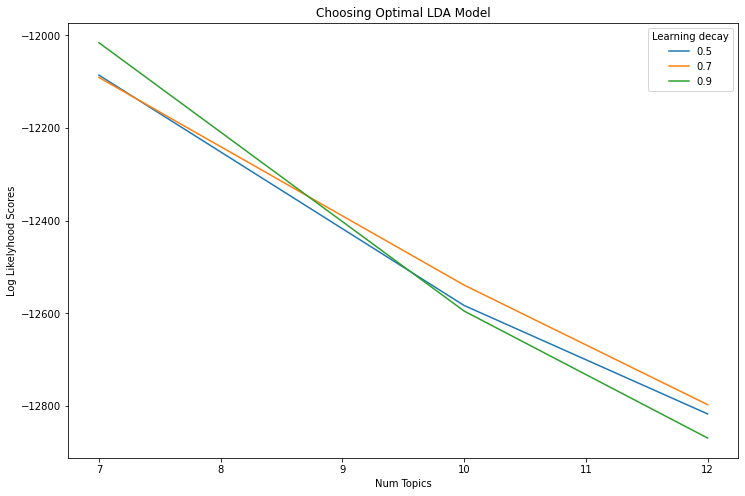

In [412]:
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [413]:
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [414]:
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)

df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [415]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

Topic Num  Num Documents
0          6            381
1          0            278
2          4            277
3          3            269
4          5            211
5          1            205
6          2            181

In [416]:
import pyLDAvis
import pyLDAvis.sklearn

In [417]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

C:\Users\aparn\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
C:\Users\aparn\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6     -29.594002  60.112713       1        1  19.977204
4     -45.996586  11.891685       2        1  15.937315
3      20.368856  70.019325       3        1  14.542125
5      53.928768  31.704309       4        1  12.921042
0     -12.437127 -26.423267       5        1  12.860735
1       3.965971  21.797720       6        1  12.069313
2      37.524284 -16.517805       7        1  11.692267, topic_info=             Term        Freq       Total Category  logprob  loglift
263       vaccine  237.000000  237.000000  Default  30.0000  30.0000
48   covidvaccine  306.000000  306.000000  Default  29.0000  29.0000
23           case  125.000000  125.000000  Default  28.0000  28.0000
172        people  121.000000  121.000000  Default  27.0000  27.0000
273          wave  106.000000  106.000000  Default  26.0000  26.0000
148          mask   82.000000   82.000000  Default  25.0000  25.0000
58          death   78.000000   78.000000  Default  24.0000  24.0000
67           dose   81.000000   81.000000  Default  23.0000  23.0000
45          covid  331.000000  331.000000  Default  22.0000  22.0000
17        booster   95.000000   95.000000  Default  21.0000  21.0000
56            day   88.000000   88.000000  Default  20.0000  20.0000
262   vaccination   90.000000   90.000000  Default  19.0000  19.0000
214           say   86.000000   86.000000  Default  18.0000  18.0000
137      lockdown   72.000000   72.000000  Default  17.0000  17.0000
228          stay   73.000000   73.000000  Default  16.0000  16.0000
280          work  108.000000  108.000000  Default  15.0000  15.0000
41         corona   50.000000   50.000000  Default  14.0000  14.0000
110          home   52.000000   52.000000  Default  13.0000  13.0000
132          life   71.000000   71.000000  Default  12.0000  12.0000
83         family   45.000000   45.000000  Default  11.0000  11.0000
70        economy   49.000000   49.000000  Default  10.0000  10.0000
112      hospital   45.000000   45.000000  Default   9.0000   9.0000
44        covaxin   58.000000   58.000000  Default   8.0000   8.0000
202        report   49.000000   49.000000  Default   7.0000   7.0000
282         world   86.000000   86.000000  Default   6.0000   6.0000
157          need   72.000000   72.000000  Default   5.0000   5.0000
168      pandemic  173.000000  173.000000  Default   4.0000   4.0000
104        health   73.000000   73.000000  Default   3.0000   3.0000
184         price   35.000000   35.000000  Default   2.0000   2.0000
246          test   41.000000   41.000000  Default   1.0000   1.0000
263       vaccine  236.273234  237.570939   Topic1  -2.0039   1.6051
67           dose   80.547721   81.388278   Topic1  -3.0800   1.6002
44        covaxin   57.171623   58.011819   Topic1  -3.4228   1.5960
261     vaccinate   35.665249   36.505497   Topic1  -3.8947   1.5873
173        pfizer   28.185098   29.025019   Topic1  -4.1301   1.5812
50     covishield   25.379624   26.219862   Topic1  -4.2349   1.5780
124           kid   25.378988   26.219893   Topic1  -4.2349   1.5780
193       receive   21.639332   22.479632   Topic1  -4.3943   1.5725
4             age   19.769474   20.609504   Topic1  -4.4847   1.5690
215        school   21.949925   23.448245   Topic1  -4.3801   1.5445
155          mrna   12.288877   13.129049   Topic1  -4.9602   1.5444
262   vaccination   82.078131   90.252591   Topic1  -3.0612   1.5156
247         thank   39.721769   44.066335   Topic1  -3.7870   1.5068
17        booster   85.065521   95.038917   Topic1  -3.0254   1.4997
18    boostershot    9.647412   11.309367   Topic1  -5.2022   1.4516
7         approve    9.342298   11.284197   Topic1  -5.2343   1.4217
222          shot   21.029195   25.508080   Topic1  -4.4229   1.4175
6        announce   11.352521   14.145562   Topic1  -5.0394   1.3906
29          child   25.774736   32.913053   Topic1  -4.2195   1.3661
48 

In [419]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords

accord   achieve        act     affect        age        amp  \
Topic0  0.143228  0.143088   0.142902   0.143021   0.142930  44.537934   
Topic1  2.949082  5.142715  13.142390   0.143221   0.142946   0.143388   
Topic2  0.303447  0.143122   0.142857  16.142002   0.142863   0.143365   
Topic3  0.142958  0.142857   0.143209   0.142956   0.142867   8.289007   
Topic4  3.998731  5.142182   0.142857   0.142936   0.142984  20.367857   
Topic5  3.360136  0.142857   0.142887   0.142916   0.142890  19.895840   
Topic6  4.102417  0.143179   0.142897   0.142949  21.142521  19.622609   

         announce   approve       area   article       ask  astrazeneca  \
Topic0   0.142902  0.142965   0.143082  1.210206  0.142930     3.512512   
Topic1   0.143236  0.142870   0.142872  0.142858  0.142857     0.142857   
Topic2   0.142882  0.142885  10.143417  0.142858  8.010271     0.142885   
Topic3   0.143059  0.142953   0.143126  0.142889  0.142977     0.142857   
Topic4   0.143837  1.294256   6.141540  3.366081  0.143433     0.142951   
Topic5   2.143099  0.142922   0.143047  0.143152  0.142869     0.142881   
Topic6  12.140986  9.991148   0.142917  5.851956  5.274662     8.773055   

            avoid    battle    believe       body     boost    booster  \
Topic0   1.236309  0.142992   0.143012   0.143010  0.142942   0.142884   
Topic1   0.143097  6.106719   0.151397  13.754691  0.143524   9.296326   
Topic2   1.251747  0.142858   0.142907   0.142908  0.142966   0.142922   
Topic3   0.143501  3.184168   0.142857   0.143036  0.142857   0.142918   
Topic4   0.143142  3.137529   0.142920   1.530438  8.799120   0.158441   
Topic5  12.939170  0.142858  11.133703   0.142969  0.142858   0.142943   
Topic6   0.143034  0.142877   0.143204   0.142948  6.485734  90.973566   

        boostershot     bring   business        buy       care        case  \
Topic0     0.142937  3.329376   0.142996   0.142857  11.493200    0.143023   
Topic1     0.967685  7.451900   2.417373   0.142999   0.143009    0.142885   
Topic2     0.143221  4.351602   0.143584   9.405715   0.143149    0.142918   
Topic3     0.142910  0.142998   4.409472   0.142972   3.621284    5.261094   
Topic4     0.142938  5.116243  16.193727  10.879659   7.956592    0.143013   
Topic5     0.142857  1.464895   1.549925   0.142904   0.142960  123.024111   
Topic6    10.317452  0.142986   0.142923   0.142893   1.499806    0.142957   

           cause     centre  challenge     change     check      child  \
Topic0  5.962690   0.142918   0.143135   0.143035  2.140008   0.143198   
Topic1  0.143457   4.504442   0.142895   0.143011  5.876102   0.143402   
Topic2  0.142907   0.142982   1.212147   0.143190  0.142858   0.142937   
Topic3  0.142857  12.638755   7.523864   0.142957  5.411946   6.718757   
Topic4  2.487826   0.142857   9.691808  34.141895  0.142857   0.143316   
Topic5  8.977059   0.558025   0.143010   0.143033  0.143227   0.143525   
Topic6  0.143203  11.870021   0.143142   0.142879  0.143002  27.564865   

          choice   citizen       come  community    company   concern  \
Topic0  0.142910  6.721770   0.143024   5.312242   0.143186  2.361364   
Topic1  0.144103  0.142858   0.142952   5.401860   2.311283  0.143266   
Topic2  3.139159  0.142986   4.041023   0.143131   0.142867  0.143018   
Topic3  0.143692  0.142929   0.143033   0.143307   1.523609  7.323395   
Topic4  2.314212  0.143121  38.709094   4.942829  13.593011  0.143129   
Topic5  1.000538  0.143009   3.677766   0.142942   0.142875  4.742720   
Topic6  5.115387  3.563327   0.143108   4.913689   0.143170  0.143108   

        condition  consider  consumer  containment   continue     corona  \
Topic0   0.636398  2.538556  0.142984     0.142904   0.143171  50.040682   
Topic1   0.142858  0.143239  0.142912     3.529725   0.142959   0.142886   
Topic2   0.142998  0.142880  7.443142     0.142857   0.142857   0.142867   
Topic3   4.271160  0.600712  0.143210     9.755938  25.933046   0.145112   
Topic4   4.138741  2.461799  3.841880   

In [420]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=7):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords


Word 0    Word 1        Word 2       Word 3  Word 4    Word 5  \
Topic 0           day    corona        family     hospital     amp    oxygen   
Topic 1        people     covid  covidvaccine  coronavirus    time   disease   
Topic 2         covid     world       economy        price    rate       oil   
Topic 3          mask  lockdown          work         stay   covid      home   
Topic 4      pandemic      need          life        today    test      come   
Topic 5          case      wave         death          say  report  pandemic   
Topic 6  covidvaccine   vaccine       booster  vaccination    dose   covaxin   

         Word 6       Word 7     Word 8  Word 9      Word 10      Word 11  \
Topic 0   virus         food    patient     die       worker       happen   
Topic 1   world    infection       year     job     immunity      country   
Topic 2     let          hit       help    feel         fall        level   
Topic 3  health  coronavirus        end    wear         face       spread   
Topic 4   covid         work     change   think  coronavirus         time   
Topic 5   covid       expert     crisis  number      country  coronavirus   
Topic 6   covid        thank  vaccinate  pfizer        child   covishield   

          Word 12  Word 13  Word 14   Word 15       Word 16  Word 17  \
Topic 0   support  warrior    fight     order         woman  mandate   
Topic 1    supply      say     hero      know    protection     body   
Topic 2      live   impact      war     study  unemployment   affect   
Topic 3  continue   follow  measure  pandemic    quarantine     time   
Topic 4       wfh     week     year      want          make     lose   
Topic 5      rise   reason      amp   variant         surge     news   
Topic 6       kid     year   school   receive          shot      age   

           Word 18     Word 19  
Topic 0      month  government  
Topic 1    prevent         act  
Topic 2       govt      oxygen  
Topic 3       hand        stop  
Topic 4      virus         amp  
Topic 5  infection        read  
Topic 6        use  government

In [437]:
Topics = ["health" , "cases" , "economy" ,"lockdown" , "work"  , "impact on people" , "vaccine"]
df_topic_keywords["Topics"]=Topics

In [438]:
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization
# Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))
# Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)
# Step 4: LDA Transform
    topic_probability_scores = lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 1:14].values.tolist()    
    # Step 5: Infer Topic
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]
    return infer_topic, topic, topic_probability_scores
# Predict the topic


In [441]:
mytext=['the effectiveness of mrna covid vaccine pfizer in pregnant women is as strong as that in the general  population']
infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(mytext)
print(topic)
print(infer_topic)

['the effectiveness of mrna covid vaccine pfizer in pregnant women is as strong as that in the general  population']
['vaccine', 'booster', 'vaccination', 'dose', 'covaxin', 'covid', 'thank', 'vaccinate', 'pfizer', 'child', 'covishield', 'kid', 'year']
vaccine


In [442]:
def apply_predict_topic(text):
    text = [text]
    infer_topic, topic, prob_scores = predict_topic(text = text)
    return(infer_topic)
df["Topics"]= df['tweet_processed'].apply(apply_predict_topic)
df

tweet_processed  \
0                                                                                                     completely healthy  year old develops life threatening blood disorder causing her to bleed out after covidvaccine now must spend the rest of her life in hospital get blood transfusions \n (    
1                                                           i see faucidogtorturer trending beagles are routine test animals as used here to show that astrazeneca covidvaccine ingredient polysorbate  = tween induced damage due to immune response complement activation covidvaccinesideeffects    
2                                                                                                                                                                                        million doses of covidvaccine ready to go for school age kids approval is - wks away   is doing a great job   
3                                                                                                                                                                the world isn't just battling the coronavirus anymore but also counterfeiters making money off of fake covidvaccine certificates \n   
4                                                                                                                                                                             not good news for ppl on anti-cd meds rituximab rituxan ocrevus kesimpta immunity covidvaccine news multiplesclerosis    
5                                                                                        any school that refuse to allow students in until  days after covidvaccine s/be shutdown full stop is this the principal of centner academy aka  hundreds of doctors criticize desantis' choice in him        
6                                                                                                     before thinking about getting your child vaccinated watch this video and ask why would media refuse to air on tv: injured covid- vaccine child study volunteer covid vaccination covidvaccine    
7                                                                                                                              to prevent disease outbreaks in a community at least  of its population must be immunized depending on the disease\ncovidvaccine \ncovid notmeus \nsinglepayersunday    
8                                                                                                                                                                                                                                  i got boosted today how about you covid covidvaccine covidbooster   
9                                                          in the war against disease you don't leave soldiers behind  adverseevents covidvaccine nor make them pay for their injuries as billion dollar profits rise help here   other bad people who have had vaccine injuries patientledresearch    
10                                                                                                                                      i feel zero empathy for people choosing to lose their jobs rather than get a covidvaccine its your choice its your consequence actionshaveconsequences covid   
11                                                                         can sod off and be prepared for a lot of law suits the covidvaccine does not prevent transmission or infection and has no bearing on natural immunity therefore the whole policy is completely flawed let alone unethical   
12                                                                                                                                                                                                                       i want you to get the covidvaccine because i care about you whoever you are   
13                                                                                                                                   

In [448]:
df.loc[df['Topics'] == 'cases']

tweet_processed  \
1                                                     i see faucidogtorturer trending beagles are routine test animals as used here to show that astrazeneca covidvaccine ingredient polysorbate  = tween induced damage due to immune response complement activation covidvaccinesideeffects    
17                                             the benefits of vaccination for most young people who would if infected only develop mild symptoms at most are that of contribution to herd immunity reduced risk of educational disruption and reducing spread of infection covid covidvaccine   
28                                                                                                                                                                                                         rural bengaluru covidvaccine availability for / at :am\nfree slots \npaid slots  (    
43                                                                          does molly understand anything about gillickcompetency\n\nif she tries to prevent -yr olds accessing a covidvaccine by using threatening language like this her actions could be considered a safeguarding concern   
45                                                                                       uttar pradesh government is now planning to shift its focus to villages with a revised rural vaccination strategy\n\nindia uttarpradesh coronaviruspandemic covid covidvaccine vaccinationdrive re \n   
50                                                      it's the covidvaccine you're peddling with coercion that have us worried you two faced powermad puppet politician\nbrain death in a vaccinated (pfizerbiontech  doses) patient with covid- infection: covidvaccinevictims vaccination    
72                                                                                                                           the rate of vaccination reflects directly the level of trust to medical authorities and to the government in general in every country covid coviduk covidvaccine    
73                                                                                                             sad that this should happen to anyonemuch less this poor girl\n\nauspol covidvic covidaus covidvaccine covid auspol coviduk covidsa covidnsw covidqld covidwa covidnt covidtas    
82                                                                                                                    countries with higher percentage of covid vaccinations are showing marginally higher percentage of new cases of covid covidvaccine vaccinemandate vaccineeffectiveness     
88                                                                         morte cerebrale in un bivaccinato pfizer con infezione covid- \n\nbrain death in a vaccinated (pfizerbiontech  doses) patient with covid- infection\n\ncovidvaccine vaccination greenpassobbligatorio covid\n\n\n\n   
92                                                                                   if you have chosen not to have the covidvaccine i do not regard you as an anti vaxer and i respect your freedom to choose and i will treat you completely equally \nregards\nsomeone who's had both jabs    
101                                                                                                                                  no more vaccins why are you selling the public the 'vaccins' while you're delaying covaxin vaccin this is disgusting covaxin covidvaccine covaxinapproval   
154                                                                     october   a political cartoon by rex a jonesantivax antivaxxer antivaxxers biglie cartoon covidvaccine covidiots covid vaccination editoralcartoon politicalcartoon getvaccinatednow anti-vaxxers getvaccinated covid    
168                                           covidtn\ncovid positive cases today-tn  individuals tested around  tpr-tn  tpr yesterday  testing down fatalities  fatality is the area of concern follow appropriate

In [445]:
df["Topics"].value_counts()

lockdown            325
work                318
vaccine             314
impact on people    291
health              274
cases               225
economy             164
Name: Topics, dtype: int64

In [449]:
df = df.sort_values(by=['Topics'])

In [450]:
header = ['tweet_processed','Topics']

In [451]:
df.to_csv('lda_op.csv' , columns=header)

### Module 3: Sentiment Analysis

### Annotation 

In [134]:
df = pd.read_csv('ldaop.csv' , encoding = 'latin', engine='python')
df

Unnamed: 0  \
0           1910   
1            362   
2            361   
3           1223   
4            353   
5           1227   
6           1238   
7           1241   
8           1255   
9           1260   
10           328   
11           325   
12           319   
13           317   
14           312   
15          1323   
16          1202   
17          1200   
18          1199   
19          1198   
20           404   
21           402   
22           401   
23           399   
24           395   
25           391   
26           389   
27          1327   
28           388   
29          1184   
30          1185   
31          1192   
32          1194   
33          1195   
34          1196   
35          1197   
36          1182   
37           405   
38          1336   
39          1337   
40          1528   
41           207   
42          1550   
43          1555   
44           200   
45           188   
46          1590   
47          1591   
48          1592   
49          1594   
50           176   
51          1603   
52          1604   
53          1607   
54           168   
55          1518   
56          1514   
57           232   
58          1474   
59          1354   
60          1366   
61          1371   
62          1398   
63          1400   
64          1406   
65          1415   
66           304   
67          1417   
68          1421   
69           262   
70          1434   
71          1441   
72           251   
73          1458   
74           241   
75          1419   
76           406   
77           408   
78           409   
79           655   
80           654   
81           652   
82           647   
83           873   
84           621   
85           617   
86           926   
87           927   
88           929   
89           939   
90           590   
91           944   
92           951   
93           580   
94           656   
95           657   
96           658   
97           669   
98           735   
99           760   
100          763   
101          770   
102          728   
103          725   
104          801   
105          953   
106          708   
107          706   
108          705   
109          704   
110          702   
111          688   
112          684   
113          846   
114          812   
115         1909   
116          957   
117          961   
118         1109   
119          455   
120         1112   
121          445   
122          435   
123          432   
124         1132   
125         1103   
126          430   
127         1139   
128          425   
129         1140   
130          417   
131          416   
132          413   
133          410   
134         1137   
135         1620   
136         1096   
137         1085   
138          965   
139          971   
140          974   
141          977   
142          533   
143          985   
144          986   
145         1091   
146          987   
147          995   
148          999   
149         1025   
150         1041   
151          490   
152         1048   
153         1078   
154          990   
155         1624   
156         1201   
157          741   
158         1883   
159         1884   
160         1677   
161           50   
162          101   
163         1726   
164         1880   
165           17   
166         1791   
167         1790   
168         1789   
169         1860   
170         1857   
171         1817   
172         1678   
173           92   
174         1702   
175         1672   
176           28   
177         1664   
178         1871   
179         1870   
180         1803   
181         1872   
182         1674   
183         1869   
184         1802   
185         1868   
186         1815   
187         1866   
188         1877   
189         1793   
190         1663   
191         1887   
192         1809   
193         1825   
194         1899   
195         1854   
196         1856   
197         1837   
198         1840   
199   

### Assign Sentiment 

In [135]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [136]:
sid_obj= SentimentIntensityAnalyzer()


In [137]:
def calculate_sentiment(tweet):     
    x = sid_obj.polarity_scores(tweet)['compound']
    if x >=0.45: 
        return 'positive' 
    else : 
        return 'negative'
    

In [138]:
df.head()

Unnamed: 0  \
0        1910   
1         362   
2         361   
3        1223   
4         353   

                                                                                                                                                                                                                                                  tweet_processed  \
0                                                                                                                                                                      covid southafrican variant detected in india how effective are covaxin covishield vaccines   
1                                                   this data sadly will now become a political football as  try to hang on to power - rather than inform change amp; future proof sector   gov failure to plan for and manage the covidcrisis  has caused harm     
2          it's not over covidcrisis covid publicinquiry wearamask johnsonout protectnhs democide torylies getborisout torycorruption russiareport toryincompetence saveournhs boristheliar wealthtax taxtherich longcovid windfalltax toriesout hoyleout sosnhs    
3                                                                                                                                                                                                                          corona dose not to feel only to listen   
4  keeping our drivers and customers safe with our new hand sanitizers \nsanitation sanitizer safety dallas dallasbusiness dallastrucking dallasfreightbroker freightbroker businessevents transportation supplychain womenintrucking traylortranspo traylortrap    

  Topics  
0  cases  
1  cases  
2  cases  
3  cases  
4  cases

In [139]:
df['sentiment'] = df['tweet_processed'].map(lambda x : calculate_sentiment(x))

In [140]:
df

Unnamed: 0  \
0           1910   
1            362   
2            361   
3           1223   
4            353   
5           1227   
6           1238   
7           1241   
8           1255   
9           1260   
10           328   
11           325   
12           319   
13           317   
14           312   
15          1323   
16          1202   
17          1200   
18          1199   
19          1198   
20           404   
21           402   
22           401   
23           399   
24           395   
25           391   
26           389   
27          1327   
28           388   
29          1184   
30          1185   
31          1192   
32          1194   
33          1195   
34          1196   
35          1197   
36          1182   
37           405   
38          1336   
39          1337   
40          1528   
41           207   
42          1550   
43          1555   
44           200   
45           188   
46          1590   
47          1591   
48          1592   
49          1594   
50           176   
51          1603   
52          1604   
53          1607   
54           168   
55          1518   
56          1514   
57           232   
58          1474   
59          1354   
60          1366   
61          1371   
62          1398   
63          1400   
64          1406   
65          1415   
66           304   
67          1417   
68          1421   
69           262   
70          1434   
71          1441   
72           251   
73          1458   
74           241   
75          1419   
76           406   
77           408   
78           409   
79           655   
80           654   
81           652   
82           647   
83           873   
84           621   
85           617   
86           926   
87           927   
88           929   
89           939   
90           590   
91           944   
92           951   
93           580   
94           656   
95           657   
96           658   
97           669   
98           735   
99           760   
100          763   
101          770   
102          728   
103          725   
104          801   
105          953   
106          708   
107          706   
108          705   
109          704   
110          702   
111          688   
112          684   
113          846   
114          812   
115         1909   
116          957   
117          961   
118         1109   
119          455   
120         1112   
121          445   
122          435   
123          432   
124         1132   
125         1103   
126          430   
127         1139   
128          425   
129         1140   
130          417   
131          416   
132          413   
133          410   
134         1137   
135         1620   
136         1096   
137         1085   
138          965   
139          971   
140          974   
141          977   
142          533   
143          985   
144          986   
145         1091   
146          987   
147          995   
148          999   
149         1025   
150         1041   
151          490   
152         1048   
153         1078   
154          990   
155         1624   
156         1201   
157          741   
158         1883   
159         1884   
160         1677   
161           50   
162          101   
163         1726   
164         1880   
165           17   
166         1791   
167         1790   
168         1789   
169         1860   
170         1857   
171         1817   
172         1678   
173           92   
174         1702   
175         1672   
176           28   
177         1664   
178         1871   
179         1870   
180         1803   
181         1872   
182         1674   
183         1869   
184         1802   
185         1868   
186         1815   
187         1866   
188         1877   
189         1793   
190         1663   
191         1887   
192         1809   
193         1825   
194         1899   
195         1854   
196         1856   
197         1837   
198         1840   
199   

### Inference from dataset

In [141]:
df.groupby(["Topics", "sentiment"]).size()

Topics            sentiment
cases             negative     186
                  positive      39
economy           negative     233
                  positive      58
health            negative     190
                  positive      84
impact on people  negative     251
                  positive      74
lockdown          negative     234
                  positive      84
vaccine           negative     226
                  positive      88
work              negative     136
                  positive      28
dtype: int64

In [142]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [143]:
stop_words = set(stopwords.words('english'))


In [144]:
data = df[['tweet_processed','sentiment']]


In [145]:
data

tweet_processed  \
0                                                                                                                                                                                                         covid southafrican variant detected in india how effective are covaxin covishield vaccines   
1                                                                                      this data sadly will now become a political football as  try to hang on to power - rather than inform change amp; future proof sector   gov failure to plan for and manage the covidcrisis  has caused harm     
2                                             it's not over covidcrisis covid publicinquiry wearamask johnsonout protectnhs democide torylies getborisout torycorruption russiareport toryincompetence saveournhs boristheliar wealthtax taxtherich longcovid windfalltax toriesout hoyleout sosnhs    
3                                                                                                                                                                                                                                                             corona dose not to feel only to listen   
4                                     keeping our drivers and customers safe with our new hand sanitizers \nsanitation sanitizer safety dallas dallasbusiness dallastrucking dallasfreightbroker freightbroker businessevents transportation supplychain womenintrucking traylortranspo traylortrap    
5                                                                                                                                                                     wary of the covid- infection vadodara police have been avoiding arrests of offenders booked for non-serious crimes in the city   
6                                                                               we are now open after this corona epidemic the entire showroom is disinfected by sanitiserfor the sake of our customer and our safety we have provided protective mask to all our staffs regular spraying and wiping   
7                                                                                                                                                                                                                                                                  covid protection solutions howrah   
8                                                                                                                                                                                                                                                             contribute for covid- fighters kolkata   
9                                                                                                                                                                                                                                                               covid shoot for broadview tv germany   
10                                                                                                                                                    help slow the spread of covid and identify at risk cases sooner by self-reporting your symptoms daily even if you feel well  download the app    
11                                                                                                                                            i woke up early to make two different meal plans: regular and meatless i have no clue what the status of the grocery store will look like today  covid   
12                                                                                                                                     for parents who plan to get their child vaccinated experts had advice on what to expect and how to prepare children my latest story covid covid covidvaccine    
13                                                                                                                                 if

In [146]:
def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    result = re.sub('\\n' ,' ',result)
    result = re.sub('\\r' ,' ',result)
    result = result.lower()
    return result
data['tweet_processed']=data['tweet_processed'].apply(lambda cw : remove_tags(cw))

C:\Users\aparn\AppData\Local\Temp/ipykernel_12104/3076939646.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_processed']=data['tweet_processed'].apply(lambda cw : remove_tags(cw))


In [147]:
data

tweet_processed  \
0                                                                                                                                                                                                     covid southafrican variant detected in india how effective are covaxin covishield vaccines   
1                                                                                  this data sadly will now become a political football as  try to hang on to power - rather than inform change amp; future proof sector   gov failure to plan for and manage the covidcrisis  has caused harm     
2                                         it's not over covidcrisis covid publicinquiry wearamask johnsonout protectnhs democide torylies getborisout torycorruption russiareport toryincompetence saveournhs boristheliar wealthtax taxtherich longcovid windfalltax toriesout hoyleout sosnhs    
3                                                                                                                                                                                                                                                         corona dose not to feel only to listen   
4                                  keeping our drivers and customers safe with our new hand sanitizers  sanitation sanitizer safety dallas dallasbusiness dallastrucking dallasfreightbroker freightbroker businessevents transportation supplychain womenintrucking traylortranspo traylortrap    
5                                                                                                                                                                 wary of the covid- infection vadodara police have been avoiding arrests of offenders booked for non-serious crimes in the city   
6                                                                           we are now open after this corona epidemic the entire showroom is disinfected by sanitiserfor the sake of our customer and our safety we have provided protective mask to all our staffs regular spraying and wiping   
7                                                                                                                                                                                                                                                              covid protection solutions howrah   
8                                                                                                                                                                                                                                                         contribute for covid- fighters kolkata   
9                                                                                                                                                                                                                                                           covid shoot for broadview tv germany   
10                                                                                                                                                help slow the spread of covid and identify at risk cases sooner by self-reporting your symptoms daily even if you feel well  download the app    
11                                                                                                                                        i woke up early to make two different meal plans: regular and meatless i have no clue what the status of the grocery store will look like today  covid   
12                                                                                                                                 for parents who plan to get their child vaccinated experts had advice on what to expect and how to prepare children my latest story covid covid covidvaccine    
13                                                                                                                             if you are due a covid- jab but have recently tested posit

In [148]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['tweet_processed'] = data.tweet_processed.apply(lemmatize_text)



C:\Users\aparn\AppData\Local\Temp/ipykernel_12104/3571705551.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_processed'] = data.tweet_processed.apply(lemmatize_text)


In [149]:
s = 0.0
for i in data['tweet_processed']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each tweet : ",s/data.shape[0])
pos = 0
for i in range(data.shape[0]):
    if data.iloc[i]['sentiment'] == 'positive':
        pos = pos + 1
neg = data.shape[0]-pos
print("Percentage of tweets with positive sentiment is "+str(pos/data.shape[0]*100)+"%")
print("Percentage of tweets with negative sentiment is "+str(neg/data.shape[0]*100)+"%")


Average length of each tweet :  21.272108843537413
Percentage of tweets with positive sentiment is 23.809523809523807%
Percentage of tweets with negative sentiment is 76.19047619047619%


In [150]:
tweets = data['tweet_processed'].values
labels = data['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [151]:
print(encoded_labels )
#1 pos
#0 neg


[1 0 0 ... 0 0 0]


In [152]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(tweets, encoded_labels, stratify = encoded_labels)


### LSTM using RNN

In [153]:
# Hyperparameters of the model
vocab_size = 200 # choose based on statistics
oov_tok = ''
embedding_dim = 90
max_length = 165 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [154]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 165, 90)           18000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              79360     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 100,481
Trainable params: 100,481
Non-trainable params: 0
_________________________________________________________________


In [155]:
num_epochs = 10
history = model.fit(train_padded, train_labels,epochs=num_epochs, verbose=2,validation_split=0.1)

Epoch 1/10
41/41 - 31s - loss: 0.5648 - accuracy: 0.7673 - val_loss: 0.6312 - val_accuracy: 0.7153 - 31s/epoch - 749ms/step
Epoch 2/10
41/41 - 8s - loss: 0.5369 - accuracy: 0.7673 - val_loss: 0.5781 - val_accuracy: 0.7153 - 8s/epoch - 185ms/step
Epoch 3/10
41/41 - 8s - loss: 0.4975 - accuracy: 0.7642 - val_loss: 0.5266 - val_accuracy: 0.7153 - 8s/epoch - 197ms/step
Epoch 4/10
41/41 - 7s - loss: 0.4452 - accuracy: 0.7913 - val_loss: 0.5077 - val_accuracy: 0.7500 - 7s/epoch - 177ms/step
Epoch 5/10
41/41 - 8s - loss: 0.4241 - accuracy: 0.8022 - val_loss: 0.5001 - val_accuracy: 0.7569 - 8s/epoch - 198ms/step
Epoch 6/10
41/41 - 8s - loss: 0.3941 - accuracy: 0.8340 - val_loss: 0.4948 - val_accuracy: 0.7639 - 8s/epoch - 194ms/step
Epoch 7/10
41/41 - 8s - loss: 0.3676 - accuracy: 0.8402 - val_loss: 0.4892 - val_accuracy: 0.7986 - 8s/epoch - 201ms/step
Epoch 8/10
41/41 - 8s - loss: 0.3533 - accuracy: 0.8472 - val_loss: 0.5058 - val_accuracy: 0.7708 - 8s/epoch - 203ms/step
Epoch 9/10
41/41 - 8s 

In [156]:
prediction = model.predict(test_padded)
pred_labels = []
for i in prediction:
    if i >=0.89:
        pred_labels.append(1)   
    else :
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

Accuracy of prediction on test set :  0.7698744769874477


In [750]:
type(test_pad)

numpy.ndarray

In [188]:
test_sent = ['covid vaccines are good for the on going pandemic' , 'uk suffered new deltavariant cases and new deaths on october of everyone irrespective of age covidvaccine failure' , 'pregnanat woman dies after taking mrna vaacine']
test_sent = np.array(test_sent)
test_seq = tokenizer.texts_to_sequences(test_sent)
test_pad = pad_sequences(test_seq, padding='post', maxlen=max_length)
test_pad = np.array(test_pad)


In [189]:
preditionsTest = model.predict(test_pad)

In [190]:
for i in preditionsTest:
    if i >=0.35:
        print('Positive')   
    else :
        print('Negative')

Positive
Negative
Negative


### MultiNomial Naive Bayes


In [491]:
x = data['tweet_processed']
y = data['sentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.1, random_state=42)

In [492]:
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [493]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [494]:
model.score(x_test, y_test)

0.828125

In [495]:
model.predict(vec.transform(['the effectiveness of mrna covidvaccine in pregnant women is as strong as that in the general  population']))


array(['positive'], dtype='<U8')

### Other ML classifiers

In [496]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [497]:
X = data['tweet_processed']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =26105111)
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  28309


#### Vectorize data before classification

In [498]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [499]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['positive' , ' negative']
    group_names = ['True Pos','False Neg','True Neg','False Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1} {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Naive Bayes

              precision    recall  f1-score   support

    negative       0.75      1.00      0.86       144
    positive       1.00      0.02      0.04        48

    accuracy                           0.76       192
   macro avg       0.88      0.51      0.45       192
weighted avg       0.82      0.76      0.65       192



array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negati

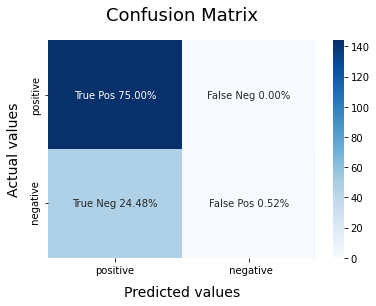

In [500]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
y_pred1

In [501]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y = data['sentiment']
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
clf = BernoulliNB()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

### Linear SVC

              precision    recall  f1-score   support

    negative       0.83      0.97      0.89       144
    positive       0.83      0.40      0.54        48

    accuracy                           0.83       192
   macro avg       0.83      0.68      0.71       192
weighted avg       0.83      0.83      0.80       192



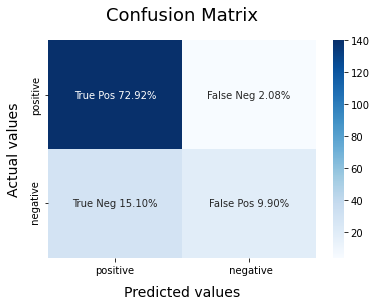

In [502]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

### Linear Regression

              precision    recall  f1-score   support

    negative       0.80      0.99      0.89       144
    positive       0.92      0.25      0.39        48

    accuracy                           0.81       192
   macro avg       0.86      0.62      0.64       192
weighted avg       0.83      0.81      0.76       192



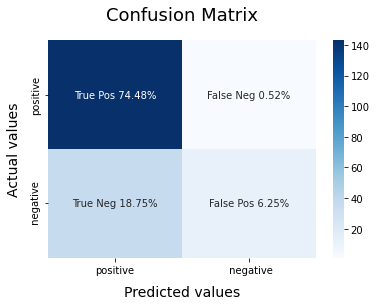

In [503]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

### KNN

              precision    recall  f1-score   support

    negative       0.79      0.90      0.84       144
    positive       0.50      0.29      0.37        48

    accuracy                           0.75       192
   macro avg       0.65      0.60      0.61       192
weighted avg       0.72      0.75      0.73       192



0.75

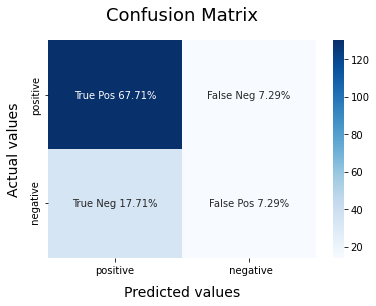

In [504]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
model_Evaluate(KNN)
y_pred4 = KNN.predict(X_test)
accuracy_score(y_test, y_pred4)

### Comparing performance

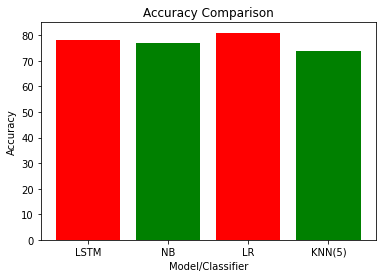

In [771]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4]

# heights of bars
height = [78,77,81,74]

# labels for bars
tick_label = ['LSTM', 'NB', 'LR', 'KNN(5)']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
		width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('Model/Classifier')
# naming the y-axis
plt.ylabel('Accuracy')
# plot title
plt.title('Accuracy Comparison')

# function to show the plot
plt.show()


### Summarisation

In [119]:
dfs = pd.read_csv('lda_op.csv')
dfs['tweet_processed'] = dfs['tweet_processed'] + '.'

In [120]:
dfs

Unnamed: 0  \
0         1398.0   
1         1910.0   
2         1908.0   
3          401.0   
4          705.0   
5          706.0   
6          580.0   
7          951.0   
8          317.0   
9         1132.0   
10         953.0   
11        1868.0   
12        1909.0   
13         770.0   
14        1415.0   
15        1184.0   
16        1185.0   
17         304.0   
18        1192.0   
19        1194.0   
20        1195.0   
21        1196.0   
22        1197.0   
23        1198.0   
24        1199.0   
25        1200.0   
26        1201.0   
27        1202.0   
28        1223.0   
29        1227.0   
30         617.0   
31        1238.0   
32        1182.0   
33        1078.0   
34        1085.0   
35        1091.0   
36         353.0   
37        1096.0   
38        1103.0   
39        1109.0   
40        1112.0   
41        1137.0   
42        1139.0   
43        1140.0   
44         328.0   
45         325.0   
46         319.0   
47         312.0   
48         361.0   
49        1241.0   
50        1260.0   
51        1441.0   
52        1458.0   
53         207.0   
54        1474.0   
55         200.0   
56        1514.0   
57        1518.0   
58         188.0   
59        1528.0   
60         176.0   
61        1550.0   
62        1555.0   
63         168.0   
64        1590.0   
65        1591.0   
66        1434.0   
67        1255.0   
68        1421.0   
69        1417.0   
70         262.0   
71        1323.0   
72        1327.0   
73        1336.0   
74         251.0   
75        1337.0   
76        1354.0   
77        1366.0   
78         241.0   
79        1371.0   
80         232.0   
81        1400.0   
82        1406.0   
83        1419.0   
84         362.0   
85        1048.0   
86        1041.0   
87         735.0   
88         741.0   
89         760.0   
90         763.0   
91         801.0   
92         812.0   
93         846.0   
94         533.0   
95         873.0   
96         490.0   
97         926.0   
98         927.0   
99         929.0   
100        939.0   
101        728.0   
102        944.0   
103        725.0   
104        708.0   
105        647.0   
106        652.0   
107        654.0   
108        655.0   
109        656.0   
110        657.0   
111        658.0   
112        669.0   
113        688.0   
114        590.0   
115        702.0   
116        704.0   
117        408.0   
118        406.0   
119        405.0   
120        404.0   
121        990.0   
122        402.0   
123        399.0   
124        995.0   
125        395.0   
126        999.0   
127        391.0   
128        389.0   
129        388.0   
130       1025.0   
131        409.0   
132        410.0   
133        987.0   
134        986.0   
135        957.0   
136        455.0   
137        961.0   
138        965.0   
139        445.0   
140        971.0   
141        974.0   
142        154.0   
143        435.0   
144        432.0   
145        430.0   
146        425.0   
147        417.0   
148        416.0   
149        985.0   
150        413.0   
151        977.0   
152       1592.0   
153        621.0   
154       1594.0   
155        101.0   
156       1702.0   
157         28.0   
158       1690.0   
159       1678.0   
160       1869.0   
161       1677.0   
162       1674.0   
163       1672.0   
164       1870.0   
165       1866.0   
166       1871.0   
167       1663.0   
168       1872.0   
169       1877.0   
170       1880.0   
171       1883.0   
172       1884.0   
173         17.0   
174       1639.0   
175       1887.0   
176       1888.0   
177       1891.0   
178       1664.0   
179       1726.0   
180         92.0   
181         88.0   
182       1815.0   
183         43.0   
184       1825.0   
185       1832.0   
186         45.0   
187       1809.0   
188       1803.0   
189       1837.0   
190       1838.0   
191         50.0   
192       1802.0   
193       1840.0   
194       1793.0   
195       1791.0   
196       1790.0   
197       1789.0   
198       1854.0   
199   

In [121]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
Topics = ["health" , "cases" , "economy" ,"lockdown" , "work"  , "impact on people" , "vaccine"]
sentences = [] 
for topic in Topics:     
    x = str(dfs['tweet_processed'].loc[dfs['Topics'] == topic])
    pattern = r'[0-9]'
    y = re.sub(pattern, '', x)
    y = re.sub("\\n","",y)
    y = re.sub(' +', ' ', y)
    sentences.append(y)

In [122]:
for i in range(0,len(sentences)):
    sentences[i] = sentences[i].replace("\\n" , " ")


In [123]:
import regex as re

In [31]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [124]:
def clean(x):
    x = re.sub('[#,\\!?=()]', '', x) #remove special characters 
    x = re.sub('\\n', '', x) #remove special characters 
    x = re.sub('\\r', '', x) #remove special characters 
    x = re.sub("\\n"," " , x)
    x= re.sub(' +', ' ', x)
    return x 


In [125]:
for i in range (0,len(sentences)): 
    sentences[i] = clean(sentences[i])


In [34]:
T5_PATH = 't5-large' # T5 model name

# initialize the model architecture and weights

t5_model = T5ForConditionalGeneration.from_pretrained(T5_PATH)

# initialize the model tokenizer

t5_tokenizer = T5Tokenizer.from_pretrained(T5_PATH)

In [90]:
def generate_summary1(tweet_data):
    #from transformers import T5Tokenizer, T5ForConditionalGeneration
    model = T5ForConditionalGeneration.from_pretrained('t5-base')
    tokenizer = T5Tokenizer.from_pretrained('t5-base')
    text = tweet_data
    Preprocessed_text = "Summary: "+ text 
    tokens_input = tokenizer.encode(Preprocessed_text,return_tensors="pt", max_length=10000, truncation=True)
    summary_ids = model.generate(tokens_input, min_length=120,max_length=500,length_penalty=4)
    summary = tokenizer.decode(summary_ids[0])

    #print(summary)
    def remove_unwanted(text):
        text = re.sub(r'<extra_id_1>', "" , text) 
        text = text.lstrip('<pad>')
        text = re.sub(r'</s>', "" , text) 
        return text
    final = remove_unwanted(summary)
    
    print(final)
    return final

### Using Pipeline

In [39]:
import transformers
from transformers import pipeline

In [40]:
summarizer = pipeline("summarization")


In [41]:
summary_text = summarizer(x,min_length=75, max_length=len(x))[0]['summary_text']
ref = [] 
ref.append(summary_text)
print("Summary:", summary_text)

Your max_length is set to 952, but you input_length is only 202. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
C:\Users\aparn\anaconda3\lib\site-packages\transformers\generation_utils.py:1648: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


Summary:  lockdown amid covid pandemic has majorly affected people who are dependent on daily wages for their survival . We have learnt the new lifestyle of frequently sanitizing our hands. We must wear our masks right not for ourself but for our loved ones. covid lockdown has made me realise: the value of family. The lockdown is just getting extended and not ending disgusting covidlife.


In [64]:
from rouge import Rouge
rouge = Rouge()


In [65]:
#health
print(Topics[0] , ":") 
x = str(sentences[0])
x = x[0:2000]
print("Using T5")
generate_summary1(x)
print("Pipeline")
print(summarizer(x,min_length=150, max_length=len(x)/2)[0]['summary_text'])
    


health :
Using T5


Your max_length is set to 1000.0, but you input_length is only 411. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


 fourth wave of covid could occur in india but not yet say experts. govt has already adapted policies and tax breaks to support a post pandemic. omicron subvariant ba has caused a huge surge in south korea. uk and several other european countries are not worried about it triggering another wave right away. bbc's national vaccination day salutes doctors nurses amp; health workers who worked tirelessly to make india's vaccination drive great success................... 
Pipeline
 covid: data shows india managed omicron wave better than others says govt . fourth covid wave could occur in india but not yet say experts . your body has ability to fight off covid can decrease over time after vaccination . when this happens a booster can help your body build back the immunity that has been lost . remote work setup the philippines said the officials of outsourcing advisor the everest group should do the same or get left behind . youths of mumbai wants following changes work life balance with / d

In [57]:
rouge.get_scores(model, ref, avg=True)

{'rouge-1': {'r': 0.23529411764705882,
  'p': 0.4444444444444444,
  'f': 0.30769230316568047},
 'rouge-2': {'r': 0.0967741935483871,
  'p': 0.18181818181818182,
  'f': 0.12631578493961237},
 'rouge-l': {'r': 0.19607843137254902,
  'p': 0.37037037037037035,
  'f': 0.25641025188362926}}

In [80]:
#cases
print(Topics[1] , ":") 
x = str(sentences[1])
x = x[0:2000]
print("Using T5")
generate_summary1(x)
print("Pipeline")
print(summarizer(x,min_length=100, max_length=len(x)/2)[0]['summary_text'])
    


cases :
Using T5


Your max_length is set to 1000.0, but you input_length is only 441. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


 experts believe that unless a deadlier variant of the virus emerges the country is unlikely to witness another wave of infections. india is registering low covid infections with active cases plummeting to a record low at comprising percent of the total infections. fresh cases were recorded while fresh fatalities were recorded. if you have recently tested positive for the virus you will need to wait at least four weeks before having your vaccination. if you have recently tested positive for covid you will need to wait at least four weeks.           .......
Pipeline
 India is registering low covid infections with active cases plummeting to a record low at comprising percent of the total infections so far the country recorded fresh cases while fresh fatalities were recorded . If you are due a covid- jab but have recently tested positive for the virus you will need to wait at least four weeks before having your vaccination full story: . you can reduce your chances of being infected or spr

#### Rouge Score 

In [81]:
rouge.get_scores(model, ref, avg=True)


{'rouge-1': {'r': 0.23529411764705882,
  'p': 0.4444444444444444,
  'f': 0.30769230316568047},
 'rouge-2': {'r': 0.0967741935483871,
  'p': 0.18181818181818182,
  'f': 0.12631578493961237},
 'rouge-l': {'r': 0.19607843137254902,
  'p': 0.37037037037037035,
  'f': 0.25641025188362926}}

In [82]:
rouge.get_scores(ref, model, avg=True)


{'rouge-1': {'r': 0.4444444444444444,
  'p': 0.23529411764705882,
  'f': 0.30769230316568047},
 'rouge-2': {'r': 0.18181818181818182,
  'p': 0.0967741935483871,
  'f': 0.12631578493961237},
 'rouge-l': {'r': 0.4074074074074074,
  'p': 0.21568627450980393,
  'f': 0.2820512775246549}}

In [83]:
#economy 
print(Topics[2] , ":") 
x = str(sentences[2])
x = x[0:2000]
print("Using T5")
generate_summary1(x)
print("Pipeline")
print(summarizer(x,min_length=100, max_length=len(x)/2)[0]['summary_text'])

economy :
Using T5


Your max_length is set to 1000.0, but you input_length is only 434. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


 smi data shows signs of further stress appearing before indian economy has recovered. russian invasion of ukraine to hurt india's economy. smi: india should immediately take steps no flights from covid hit countries. smi: india should immediately take steps no flights from covid hit countries. smi: india should immediately take steps to prevent further stress. smi: india should take steps to prevent further spread of covid. smi:                                    
Pipeline
 smi data shows signs of further stress appearing before the indian economy has recovered from the impact of covid . The intent of govt . for conducting census was notified in gazette of india on march th however due to outbreak of . covid- pandemic the conduct of census and the related field activities have been postponed until further orders . although panic stockpiling may have left shelves empty there may be some silver linings in the coronavirus cloud such as a rise in online grocery shopping deliveries and ser

In [195]:
y = str(sentences[3])
y = y[0:2000]
y

" covid lockdown worst phase of life. we must wear our masks right not for ourself but for our loved ones. speak for yourself masks are a major hindrance they are hideous to wear esp for many hours most people don't wear them properly amp; most spread is in private homes universal masking is pointless in that sense vaccines were meant to end this totalitarian nonsense covid. due to corona lockdown s have lost their earnings shri yog vedant seva samiti bengaluru inspired by sant shri asharamji bapu distributed ration kits to families of daily wages labourers in bengaluru. lockdown amid covid pandemic has majorly affected people who are dependent on daily wages for their survival. this just means the vaxxes are working yeah auspol covidvic covidaus covidvaccine covid auspol coviduk covidsa covidnsw covidqld covidwa covidnt covidtas . one of best solutions is use of container in form of instant hospital and quarantine to fight against covid- penadmic. we love this resource by the on how t

In [84]:
#lockdown
print(Topics[3] , ":") 
x = str(sentences[3])
x = x[0:2000]
print("Using T5")
generate_summary1(x)
print("Pipeline")
print(summarizer(x,min_length=100, max_length=len(x)/2)[0]['summary_text'])
    


lockdown :
Using T5


Your max_length is set to 1000.0, but you input_length is only 454. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


 covid restrictions to be lifted in india from march. however wearing masks amp; maintaining social distancing norms will stay. i'm sick and tired of being responsible for someone else's fears. i'm sick and tired of being responsible for someone else's fears. i'm sick and tired of being responsible for someone else's fears. i'm sick and tired of being responsible for someone else's fears. i'm sick and tired of being responsible for..................
Pipeline
 We must wear our masks right not for ourself but for our loved ones . We love this resource by the on how to talk to your friends and family members about the covidvaccine vaccinessavelives getthevax . i'm sick and tired of being responsible for someone else's fears i'm not responsible for your health either . If you're worried wear a mask social distance or just stay home stop pretending you have the right to make me do it for   .


In [85]:
rouge.get_scores(model, ref, avg=True)


{'rouge-1': {'r': 0.23529411764705882,
  'p': 0.4444444444444444,
  'f': 0.30769230316568047},
 'rouge-2': {'r': 0.0967741935483871,
  'p': 0.18181818181818182,
  'f': 0.12631578493961237},
 'rouge-l': {'r': 0.19607843137254902,
  'p': 0.37037037037037035,
  'f': 0.25641025188362926}}

In [86]:
rouge.get_scores(ref, model, avg=True)


{'rouge-1': {'r': 0.4444444444444444,
  'p': 0.23529411764705882,
  'f': 0.30769230316568047},
 'rouge-2': {'r': 0.18181818181818182,
  'p': 0.0967741935483871,
  'f': 0.12631578493961237},
 'rouge-l': {'r': 0.4074074074074074,
  'p': 0.21568627450980393,
  'f': 0.2820512775246549}}

In [87]:
#vaccine

In [96]:
print(Topics[6] , ":") 
x = str(sentences[6])

vaccine :


In [98]:
print("Using T5")
generate_summary1(x)
print("Pipeline")
print(summarizer(x,min_length=100, max_length=len(x)/2)[0]['summary_text'])

Using T5


Your max_length is set to 570.5, but you input_length is only 247. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


 False positive results from covid vaccines. no correlation between covid- vaccination and risk of miscarriage. nba getvaccinated covid.vaccines that actually work unlike covidvaccine. nba: covid vaccines are not safe and should be given to all. nba: covid vaccines are safe and effective. nba: covid vaccines are safe and effective. nba: covid vaccines are safe    
Pipeline
 There is no correlation between covid- vaccination and risk of miscarriage in the first trimester study finds canada's national advisory committee on immunization recommends a full vaccine course be offered to pregnant individuals . There are a few common side effects of the covidvaccine like a sore arm feeing achy or tired and a headache but they should only last a day . The first vaccine against rabies required  doses in  days . Current vaccines only requires  doses  in  month booster vaccine .


In [99]:
rouge.get_scores(model, ref, avg=True)


{'rouge-1': {'r': 0.23529411764705882,
  'p': 0.4444444444444444,
  'f': 0.30769230316568047},
 'rouge-2': {'r': 0.0967741935483871,
  'p': 0.18181818181818182,
  'f': 0.12631578493961237},
 'rouge-l': {'r': 0.19607843137254902,
  'p': 0.37037037037037035,
  'f': 0.25641025188362926}}

In [100]:
rouge.get_scores(ref, model, avg=True)


{'rouge-1': {'r': 0.4444444444444444,
  'p': 0.23529411764705882,
  'f': 0.30769230316568047},
 'rouge-2': {'r': 0.18181818181818182,
  'p': 0.0967741935483871,
  'f': 0.12631578493961237},
 'rouge-l': {'r': 0.4074074074074074,
  'p': 0.21568627450980393,
  'f': 0.2820512775246549}}

In [113]:
#economy
print(Topics[2] , ":") 
x = str(sentences[2])
x = x[0:2000]
print("Using T5")
generate_summary1(x)

    


economy :
Using T5
 india should immediately take steps no flights from covid hit countries. kerala was the first state to report cases of coronavirus in india. smi data suggests that any serious rebound from impact of covid will now be further set back due to russian invasion of ukraine. india's economy shrunk post wordwide due to covidso india's gdp instead of being lower managed to reach the same level again. smi: if you are      


" india should immediately take steps no flights from covid hit countries. kerala was the first state to report cases of coronavirus in india. smi data suggests that any serious rebound from impact of covid will now be further set back due to russian invasion of ukraine. india's economy shrunk post wordwide due to covidso india's gdp instead of being lower managed to reach the same level again. smi: if you are      "

In [104]:
print("Pipeline")
print(summarizer(x,min_length=100, max_length=len(x)/2)[0]['summary_text'])

Your max_length is set to 500.0, but you input_length is only 213. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Pipeline
 smi data shows signs of further stress appearing before the indian economy has recovered from the impact of covid india smi economy.. india should immediately take steps no flights from covid hit countries . There may be some silver linings in the coronavirus cloud such as a rise in online grocery shopping deliveries drive-thrus and services like post-mates . The intent of govt for conducting census was notified in gazette of india on march th however due to outbreak of pandemic the conduct of census and the related field activities have been affected .


In [114]:
rouge.get_scores(model, ref, avg=True)


{'rouge-1': {'r': 0.23529411764705882,
  'p': 0.4444444444444444,
  'f': 0.30769230316568047},
 'rouge-2': {'r': 0.0967741935483871,
  'p': 0.18181818181818182,
  'f': 0.12631578493961237},
 'rouge-l': {'r': 0.19607843137254902,
  'p': 0.37037037037037035,
  'f': 0.25641025188362926}}

In [115]:
rouge.get_scores(ref, model, avg=True)


{'rouge-1': {'r': 0.4444444444444444,
  'p': 0.23529411764705882,
  'f': 0.30769230316568047},
 'rouge-2': {'r': 0.18181818181818182,
  'p': 0.0967741935483871,
  'f': 0.12631578493961237},
 'rouge-l': {'r': 0.4074074074074074,
  'p': 0.21568627450980393,
  'f': 0.2820512775246549}}

In [126]:
#work
print(Topics[4] , ":") 
x = str(sentences[4])
x = x[0:2000]
print("Using T5")
generate_summary1(x)

work :
Using T5
 a recent survey of india inc found most employees would turn down an appointment with a higher salary if it required them to come to work every day. if remote working is preferred, offices should provide traveling passes or if they cannot then wfh. if they put vaccine in liquor half the population would be vaccinated within a week. if they put vaccine in liquor half the population would be vaccinated within a week. if they put vaccine in liquor half the population would    


' a recent survey of india inc found most employees would turn down an appointment with a higher salary if it required them to come to work every day. if remote working is preferred, offices should provide traveling passes or if they cannot then wfh. if they put vaccine in liquor half the population would be vaccinated within a week. if they put vaccine in liquor half the population would be vaccinated within a week. if they put vaccine in liquor half the population would    '

In [127]:
print("Pipeline")
print(summarizer(x,min_length=100, max_length=len(x)/2)[0]['summary_text'])

Your max_length is set to 1000.0, but you input_length is only 443. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Pipeline


C:\Users\aparn\anaconda3\lib\site-packages\transformers\generation_utils.py:1648: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


 Most employees would turn down an appointment with a higher salary if it required them to come to work every day read more at diverceety workfromhome workfromanywhere remotework . Youngsters of mumbai wants following changes work life balance with / day working clean air frm petrol diesel vehicles minimum wage offices should provide traveling passes or if they cannot then then wfh . i want you to get the covidvaccine because i care about you whoever you are. if they put vaccine in liquor half the population would be vaccinated within a week .


In [192]:
print(Topics[3] , ":") 
x = str(sentences)
x = x[0:2000]
print("Using T5")
generate_summary1(x)
print("Pipeline")
print(summarizer(x,min_length=100, max_length=len(x)/2)[0]['summary_text'])
    


lockdown :
Using T5


Your max_length is set to 1000.0, but you input_length is only 454. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


 covid restrictions to be lifted in india from march. however wearing masks amp; maintaining social distancing norms will stay. i'm sick and tired of being responsible for someone else's fears. i'm sick and tired of being responsible for someone else's fears. i'm sick and tired of being responsible for someone else's fears. i'm sick and tired of being responsible for someone else's fears. i'm sick and tired of being responsible for...
Pipeline


C:\Users\aparn\anaconda3\lib\site-packages\transformers\generation_utils.py:1648: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


 We must wear our masks right not for ourself but for our loved ones . We love this resource by the on how to talk to your friends and family members about the covidvaccine vaccinessavelives getthevax . i'm sick and tired of being responsible for someone else's fears i'm not responsible for your health either . If you're worried wear a mask social distance or just stay home stop pretending you have the right to make me do it for   .
